In [2]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh

In [3]:
# in your notebook cell
import sys

# path relative to your notebook
sys.path.insert(0, '../src')

# import as usual
import functions

In [4]:
# autoreload
%load_ext autoreload
%autoreload 2

In [5]:
us_videos_csv = functions.read_file('../data/USvideos.csv')
us_videos_json = functions.read_file('../data/US_category_id.json')
final_df = functions.merge_csv_json(us_videos_csv, us_videos_json)

In [6]:
final_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Cat_Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [7]:
final_df.groupby("Cat_Title")['views'].sum().sort_values(ascending=False)

Cat_Title
Music                    40132892190
Entertainment            20604388195
Film & Animation          7284156721
Comedy                    5117426208
People & Blogs            4917191726
Sports                    4404456673
Howto & Style             4078545064
Science & Technology      3487756816
Gaming                    2141218625
News & Politics           1473765704
Education                 1180629990
Pets & Animals             764651989
Autos & Vehicles           520690717
Travel & Events            343557084
Nonprofits & Activism      168941392
Shows                       51501058
Name: views, dtype: int64

In [8]:

final = final_df.groupby("Cat_Title")['views'].sum().nlargest(5)
print(final)

Cat_Title
Music               40132892190
Entertainment       20604388195
Film & Animation     7284156721
Comedy               5117426208
People & Blogs       4917191726
Name: views, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Music'),
  Text(1, 0, 'Entertainment'),
  Text(2, 0, 'Film & Animation'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'People & Blogs')])

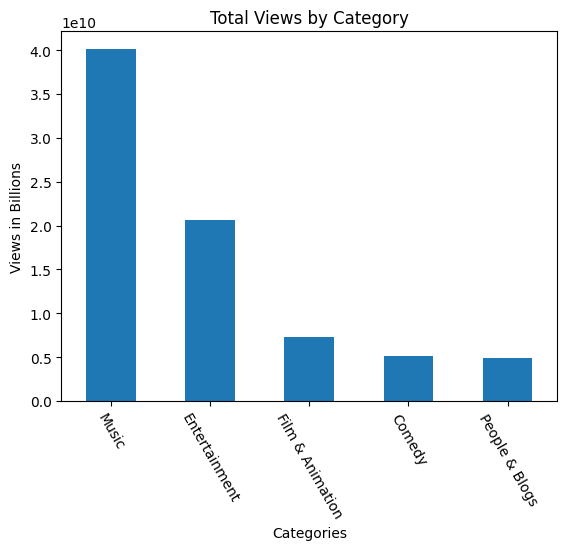

In [9]:
fig, axs = plt.subplots()
final.plot(kind='bar')
plt.title('Total Views by Category')
plt.ylabel('Views in Billions')
plt.xlabel('Categories')
plt.xticks(rotation = 300)

In [10]:
#final = final_df.groupby("title")['views'].sum().nlargest(20)
#final

In [11]:
final_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Cat_Title
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,Pets & Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,People & Blogs
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,Entertainment
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,Film & Animation


In [12]:
final_df
final

Cat_Title
Music               40132892190
Entertainment       20604388195
Film & Animation     7284156721
Comedy               5117426208
People & Blogs       4917191726
Name: views, dtype: int64

In [13]:
#corr = final.corr
#corr

In [14]:
music = final_df[final_df['Cat_Title'] == 'Music']
#.nlargest(20, columns='views')

#corr = music.corr(method='pearson', numeric_only=True)
top_five_music = music.groupby('channel_title')['views'].sum().nlargest(5)



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'ChildishGambinoVEVO'),
  Text(1, 0, 'ibighit'),
  Text(2, 0, 'ArianaGrandeVevo'),
  Text(3, 0, 'MalumaVEVO'),
  Text(4, 0, 'jypentertainment')])

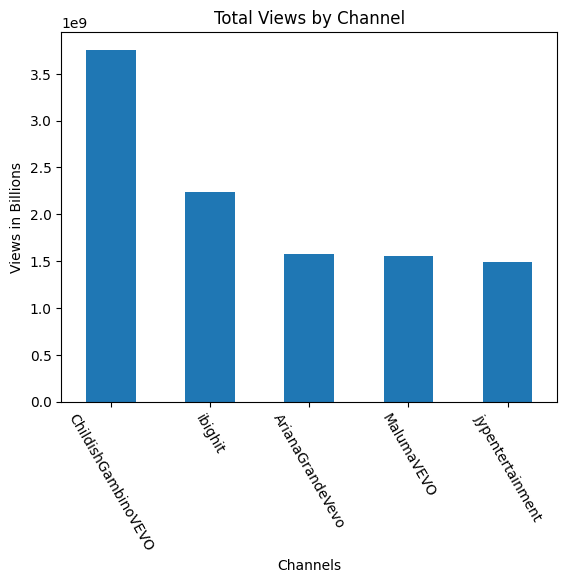

In [16]:
fig, axs = plt.subplots()
top_five_music.plot(kind='bar')
plt.title('Total Views by Channel')
plt.ylabel('Views in Billions')
plt.xlabel('Channels')
plt.xticks(rotation = 300)

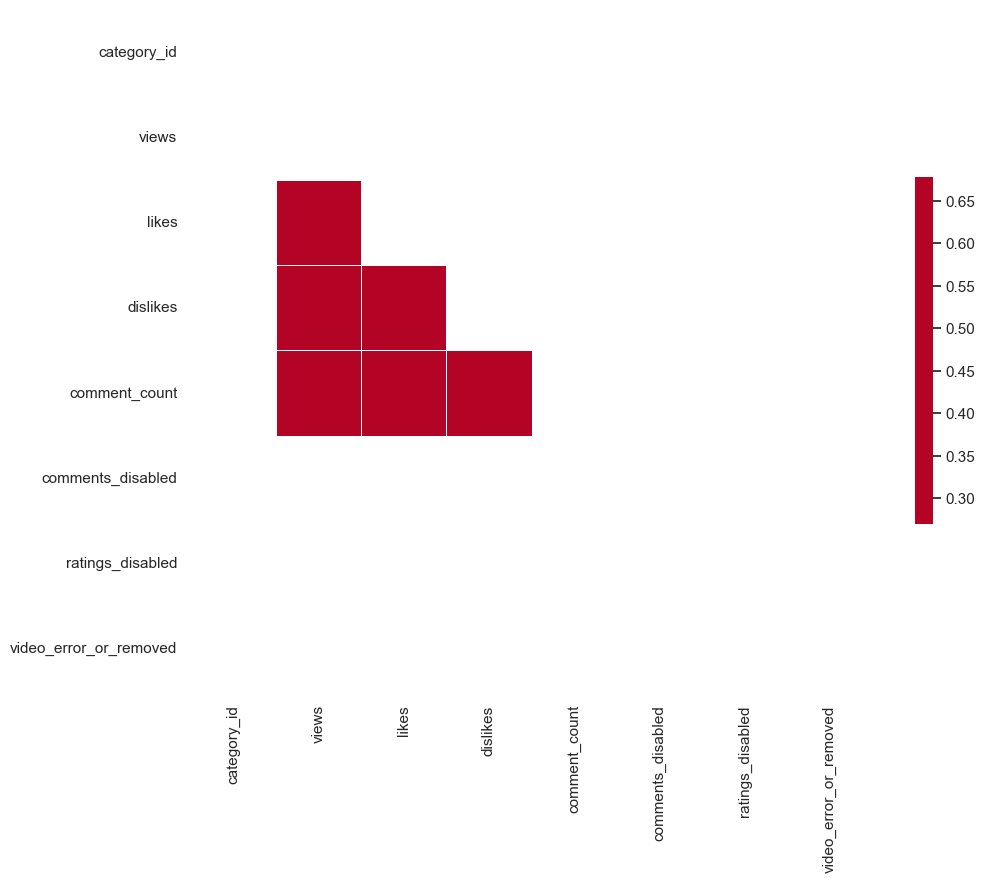

In [61]:
sns.set_theme(style="white")

    # Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

    # Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5});